# 02. NEURAL NETWORK CLASSIFICATION WITH PYTORCH

Resource:
https://www.learnpytorch.io/02_pytorch_classification/

https://github.com/mrdbourke/pytorch-deep-learning

## 1. Make custom classification data and get it ready

In [2]:
import sklearn
from sklearn.datasets import make_circles

In [3]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [6]:
import numpy as np
np.unique(y)

array([0, 1])

#### Lools like we have to do binary classificaiton

In [7]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                       "label": y})
circles.head(5)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [8]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

# Visualizing the data

In [9]:
import matplotlib.pyplot as plt

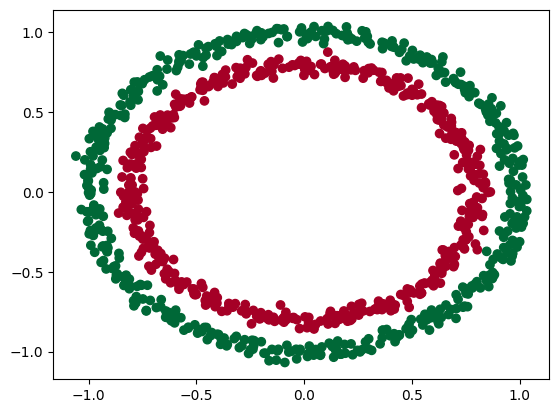

In [10]:
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlGn_r)
plt.show()

Note: The data that we are working with is a toy dataset, a data that is small enough to experiment but still sizeable enough to practice the fundamentals

### Checking input and output shapes

In [11]:
X.shape, y.shape

((1000, 2), (1000,))

In [12]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

### Turning our data into tensors and creating training and testing splits

In [13]:
import torch
torch.__version__

'2.1.0+cu121'

In [14]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
type(X)

torch.Tensor

In [15]:
X.dtype

torch.float32

In [16]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [17]:
# Training and test set split
from sklearn.model_selection import train_test_split

In [18]:
torch.manual_seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

## Building a model

Model to classify our blue and red dots

To Do:

1. Setup Device agnostic code to run model on accelerator(GPU)

2. Create a model (by subclassing `nn.Module`)

3. Define a loss function and optimizer

4. Create a training and testing loop

In [19]:
# Import PyTorch and nn
import torch
from torch import nn

In [20]:
# 1. Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### 2. Create a model

1. Subclass `nn.Module` (almost all modules in PyTorch subclass use `nn.Module`)
2. Create two `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward() method` (method will define forward pass of the model)
4. Instantiate an instance of our model class and sen ti to the target device

In [21]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # Linear layers to handle our data
    # First layer takes in 2 input features and upscaes to 5 features
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    # 2nd layer takes inpur from the first layer output and gives back the ourfeatures
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

    # # An anternate way to create sequential linear layers is using nn.Sequential
    # # This will give same result as above is the model is sequential and there is
    # # no complex forward pass code involbed
    # self.two_linear_layers = nn.Sequential(
    #     nn.Linear(in_features=2, out_features=5),
    #     nn.Linear(in_features=5, out_features=1)
    # )

  # Define a forward() method that outlines the forward pass
  def forward(self, x):
    # Here x(data/initial features) goes to layer 1 and the output of layer 1 goes to layer 2
    return self.layer_2(self.layer_1(x))

    # # Alternate way of creating models using nn.Sequential
    # return self.two_linear_layers(x)

# 4. Instantiate an instance of our model class and send it to the target device

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
device

'cpu'

In [23]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188]], requires_grad=True)

In [24]:
next(model_0.parameters()).device

device(type='cpu')

In [25]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [26]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [27]:
# Make predections without training
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of prediction: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"\nLength of test sample: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of prediction: 200, Shape: torch.Size([200, 1])

Length of test sample: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### Setup loss function and optimizer

Which loss function or optimizer should we use

For example, for regression we use `MAE(Mean Absolute Error)` or `MSE(Mean Squared Error)`
For classificaiton we can use `Binary Cross Entropy`/`log loss` or `Catagorical Cross Entropy`
generally called as `Cross Entropy`

* As a reminder, the loss function measures how *wrong* your models predictions are with resprct to true labels

* And for optimizers, two of the most common and useful are SGD and Adam, however pytorch has many other options

* For our loss function we are going to use `torch.nn.BCEWithLogitsLoss()`

In [28]:
# Setup the loss function
"""
BCEWithLogitsLoss has Sigmoid activation function builtin.

Here the Binary Cross Entropy is applied to the raw logits before passing the
data to Sigmoid activation function.

**In deep learning "logits" are the raw, unnormalized output of a neural network
before it undergoes the final activaiton function
"""
loss_fn = nn.BCEWithLogitsLoss() # This has sigmoid activation function built in

# There is also nn.BCELoss() loss function. This requires inputs to have gone through
# the sigmoid activation function prior to input to BCELoss

# Setting up optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01, momentum=0.9)

In [29]:
# Calculate accuracy
# Accuracy = True Positive / (True Positive + True Negative) * 100
def accuracy_fn(y_true, y_pred):
  # torch.eq checks how many y_true == y_pred
  # item() is used to extract scaler valur from tensor(deals with tensors with only one value)
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

# TRAINING OUR MODEL

### Training Loop
1. Forward Pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (Back-propagation)
5. Optimizer (gradient descent)

### Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**

* We can convert these **logits** into prediction propabilities by passing them to some kind of activation function (e.g.: sigmoid for binary classification and softmax for multiclass classification)

* We can convert our `model's prediction probabilities` to `prediction labels` by either `rounding` them or taking the `argmax()`

In [30]:
# View the first 5 output of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [31]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [32]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

In [33]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]])

In [34]:
# To get similar format as y_test
v = torch.squeeze(torch.round(y_pred_probs))
v

tensor([0., 0., 1., 0., 1.])

In [35]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred_probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Checking for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimention
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

In [36]:
# Building the training and testing loop

# Code reproducability
if device == "cpu":
  torch.manual_seed(42)
elif device == "cuda":
  torch.cuda.manual_seed(42)

# setting number of epoch
epochs = 100

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building the training and evalustion loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. FORWARD PASS
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # # if we were using nn.BCELoss, it expects prediction probabilities as input
  # # and torch.sigmoid(y_logits) with turn lotigs to prediction probabilities
  # loss = loss_fn(torch.sigmoid(y_logits),
  #                y_train)

  # 2. CALCULATING LOSS AND TRAINING ACCURACY
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # 3. OPTIMIZER ZERO GRAD
  optimizer.zero_grad()

  # 4. LOSS BACKWARDS (BACK-PROPAGATION)
  loss.backward()

  # 5. OPTIMIZER STEP (GRADIENT DESCENT)
  optimizer.step()


  ### Testing
  model_0.eval()

  with torch.inference_mode():
    # 1. FORWARD PASS
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # CALCULATE TEST LOSS AND ACCURACY
    test_loss = loss_fn(test_logits, # Here predictions should come first and true values will come next
                        y_test)
    test_acc = accuracy_fn(y_true=y_test, # According to sklearn library syntex true value come first and predicted values come next
                           y_pred=test_pred)


  # Print out epoch results
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.5f}, Train Acc: {acc:.5f} | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")



Epoch: 0 | Train Loss: 0.69796, Train Acc: 51.87500 | Test Loss: 0.69460 | Test Acc: 57.50%
Epoch: 10 | Train Loss: 0.69688, Train Acc: 51.50000 | Test Loss: 0.69369 | Test Acc: 56.00%
Epoch: 20 | Train Loss: 0.69548, Train Acc: 51.37500 | Test Loss: 0.69278 | Test Acc: 52.00%
Epoch: 30 | Train Loss: 0.69461, Train Acc: 51.12500 | Test Loss: 0.69237 | Test Acc: 50.00%
Epoch: 40 | Train Loss: 0.69413, Train Acc: 50.37500 | Test Loss: 0.69226 | Test Acc: 50.50%
Epoch: 50 | Train Loss: 0.69384, Train Acc: 49.37500 | Test Loss: 0.69228 | Test Acc: 50.50%
Epoch: 60 | Train Loss: 0.69365, Train Acc: 49.62500 | Test Loss: 0.69234 | Test Acc: 51.00%
Epoch: 70 | Train Loss: 0.69351, Train Acc: 49.12500 | Test Loss: 0.69242 | Test Acc: 53.00%
Epoch: 80 | Train Loss: 0.69342, Train Acc: 49.25000 | Test Loss: 0.69251 | Test Acc: 50.00%
Epoch: 90 | Train Loss: 0.69335, Train Acc: 49.37500 | Test Loss: 0.69260 | Test Acc: 53.00%


## Making predictions and evaluating the model

From the metrices it looks like our model isn't learning anything...

So to inspect ti let's make some predictions and make them visual

To do so, we're going to import a function called `plot_decision_boundary()`

# GO THROUGH THE FOLLOWING RESOURCE (FOR NEURAL NETWORKS AND MLOPS)
https://madewithml.com/courses/foundations/neural-networks/

In [37]:
import requests
from pathlib import Path

# Download helper functions from learn pytorch repo(if it is not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already existis")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [38]:
from helper_functions import plot_predictions, plot_decision_boundary

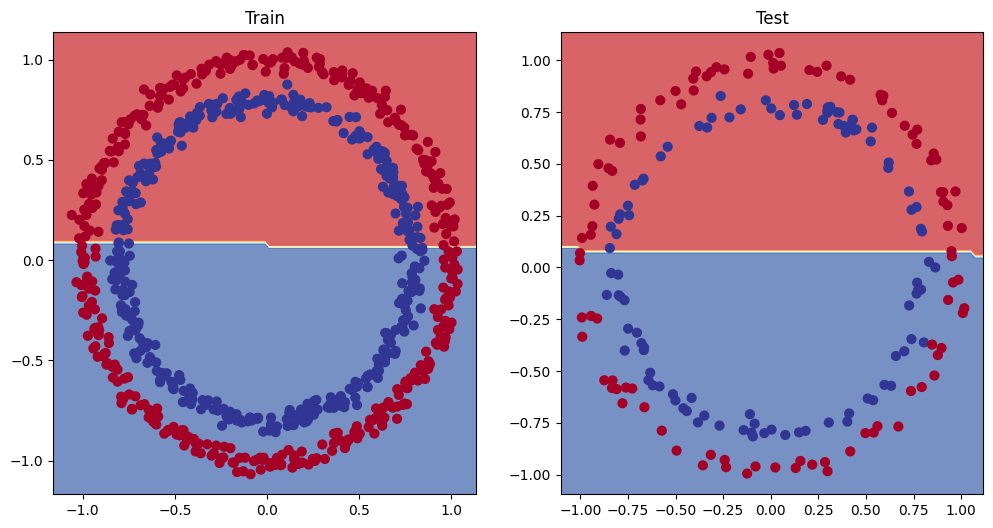

In [39]:
# Plotting decision boundary of model

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## Improving the model

**Options:**

* Add more layers - give the model more chances to learn about patterns in the data

* Add more hidden units - We can go from 5 hidden units(output/input of the hidden layer) from 10 hidden

* Adding hidden layers

* Changing the activation functions

* Changing the learning rate

In [40]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0853, -0.2761],
                      [ 0.4591, -0.5178],
                      [-0.3273, -0.1944],
                      [-0.4213,  0.0506],
                      [-0.7022,  0.6587]])),
             ('0.bias', tensor([-0.6059,  0.5231,  0.1146, -0.2207,  0.4284])),
             ('1.weight',
              tensor([[ 0.0747,  0.2382,  0.0242, -0.1050,  0.1988]])),
             ('1.bias', tensor([-0.1887]))])

# Applying improvement to the model

In [41]:
# Increasing the number of hidden units: 5 -> 10
# Increasing the number of layers: 2 -> 3
# Increasing the number of epochs: 100 -> 1000

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)  # logits are represented using 'z'
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # This type of writtin leverages speed ups where ever possible behing the scene

In [42]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [43]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [44]:
# Creating new loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.01, momentum=0.9)

In [45]:
# Writing a training and evaluation loop for model_1

# Code reproducability
if device == "cpu":
  torch.manual_seed(42)
elif device == "cuda":
  torch.cuda.manual_seed(42)

# setting number of epoch
epochs = 1000

# Putting data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# TRAINING LOOP

for epoch in range(epochs):

  ### Training
  model_1.train()

  # 1. FORWARD PASS
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> prediction labels

  # 2. CALCULATING LOSS/ACCURACY
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. OPTIMIZER ZERO GRAD
  optimizer.zero_grad()

  # 4. LOSS BACKWARD (BACKWARD-PROPAGATION)
  loss.backward()

  # 5. OPTIMIZER STEP (GRADIENT DESCENT)
  optimizer.step()


  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. FORWARD PASS
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. CALCULATE LOSS
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Acc: {acc:.5f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Train Loss: 0.69396 | Train Acc: 50.87500% | Test Loss: 0.69261 | Test Acc: 51.00%
Epoch: 10 | Train Loss: 0.69383 | Train Acc: 50.62500% | Test Loss: 0.69264 | Test Acc: 50.50%
Epoch: 20 | Train Loss: 0.69363 | Train Acc: 50.25000% | Test Loss: 0.69273 | Test Acc: 50.00%
Epoch: 30 | Train Loss: 0.69347 | Train Acc: 50.00000% | Test Loss: 0.69286 | Test Acc: 48.00%
Epoch: 40 | Train Loss: 0.69335 | Train Acc: 50.00000% | Test Loss: 0.69301 | Test Acc: 49.00%
Epoch: 50 | Train Loss: 0.69325 | Train Acc: 50.25000% | Test Loss: 0.69316 | Test Acc: 48.00%
Epoch: 60 | Train Loss: 0.69318 | Train Acc: 49.62500% | Test Loss: 0.69331 | Test Acc: 50.00%
Epoch: 70 | Train Loss: 0.69313 | Train Acc: 49.62500% | Test Loss: 0.69344 | Test Acc: 50.50%
Epoch: 80 | Train Loss: 0.69309 | Train Acc: 49.87500% | Test Loss: 0.69357 | Test Acc: 50.50%
Epoch: 90 | Train Loss: 0.69307 | Train Acc: 50.12500% | Test Loss: 0.69369 | Test Acc: 48.00%
Epoch: 100 | Train Loss: 0.69304 | Train Acc: 50.25

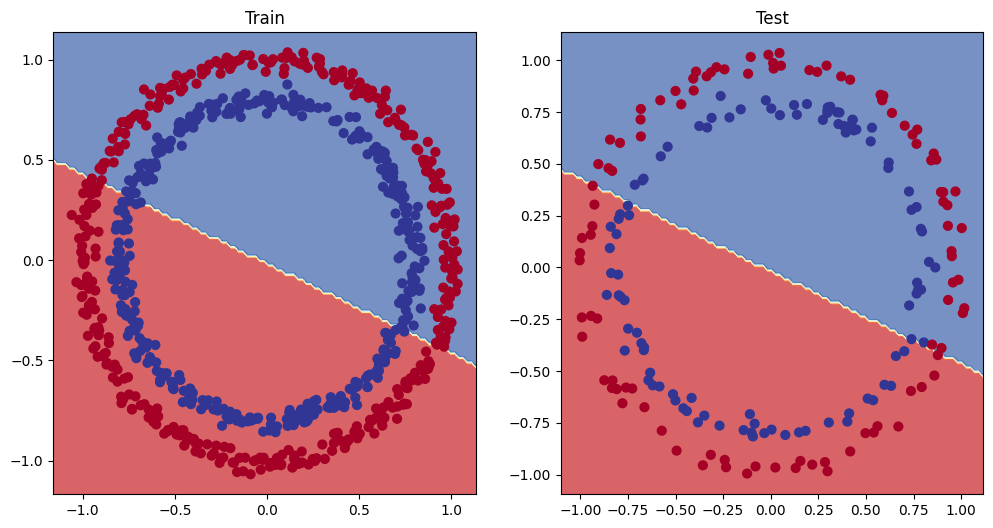

In [46]:
# Plotting decision boundary of new model

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

# As the data non Linear we need to use a NON LINEAR ACTIVATION FUNCTION

* Artificial neural networks are a large combination of linear(straight) and non-linear(non-straight) functions which are potentially able to find patterns in data.

* So rather than telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own. And the tools are linear and non-linear functions.

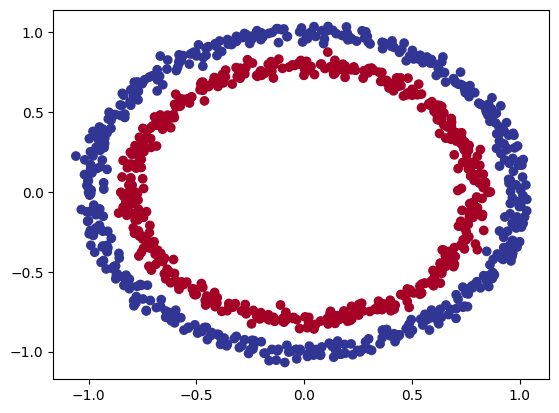

In [47]:
# Recreating the data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu_r)

In [48]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turning data to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [50]:
# Building the model
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # ReLU is a non-linear activation function

  def forward(self, x):
    """
    Where should we put our non-linear activation function
    """
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [51]:
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [52]:
# Setup loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1,
                            momentum=0.9)

### Training a model with non-linearity

In [53]:
# Random seeds
torch.manual_seed(42)
# torch.cuda.manual_seed(42)

# Put all the data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train) #BCEWithLogitsLoss (Takes logits as the first input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Printing training loop info
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train los: {loss:.5f} | train acc: {acc:.5f}% | test loss: {test_loss:.5f} | test acc: {test_acc:.2f}%")

Epoch: 0 | Train los: 0.69295 | train acc: 50.00000% | test loss: 0.69319 | test acc: 50.00%
Epoch: 100 | Train los: 0.65759 | train acc: 59.87500% | test loss: 0.65236 | test acc: 62.50%
Epoch: 200 | Train los: 0.07605 | train acc: 99.87500% | test loss: 0.10397 | test acc: 100.00%
Epoch: 300 | Train los: 0.01955 | train acc: 99.87500% | test loss: 0.03700 | test acc: 100.00%
Epoch: 400 | Train los: 0.01141 | train acc: 100.00000% | test loss: 0.02621 | test acc: 100.00%
Epoch: 500 | Train los: 0.00809 | train acc: 100.00000% | test loss: 0.02172 | test acc: 99.50%
Epoch: 600 | Train los: 0.00630 | train acc: 100.00000% | test loss: 0.01881 | test acc: 99.50%
Epoch: 700 | Train los: 0.00518 | train acc: 100.00000% | test loss: 0.01679 | test acc: 99.50%
Epoch: 800 | Train los: 0.00442 | train acc: 100.00000% | test loss: 0.01541 | test acc: 99.50%
Epoch: 900 | Train los: 0.00386 | train acc: 100.00000% | test loss: 0.01445 | test acc: 99.50%


# Evaluating the model

In [54]:
# Making predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

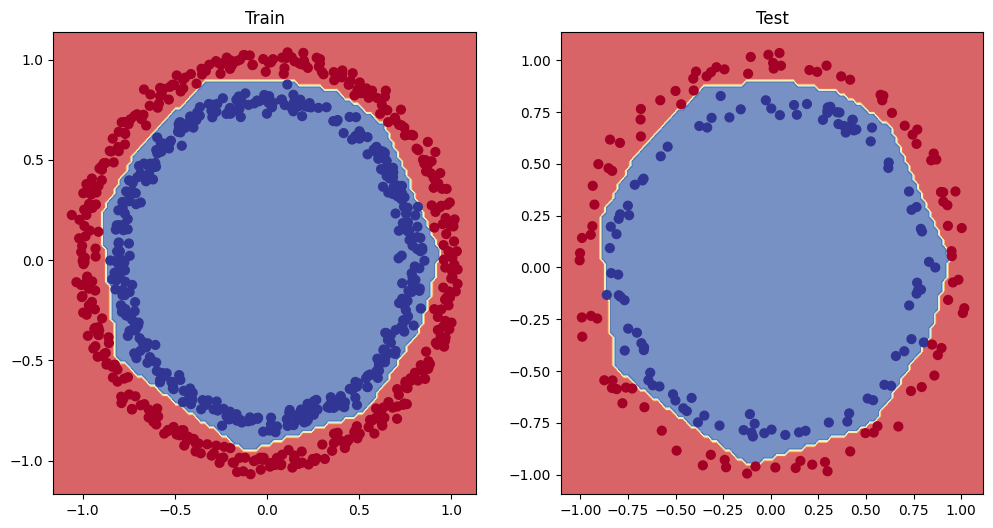

In [55]:
# Plotting decision boundary of new model

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # number of rows, number of columns, 1st plot
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)

plt.subplot(1, 2, 2) # number of rows, number of columns, 2st plot
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

# Replicating non-linear activation function (for understanding)

In [56]:
# Create a tensor

A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [57]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

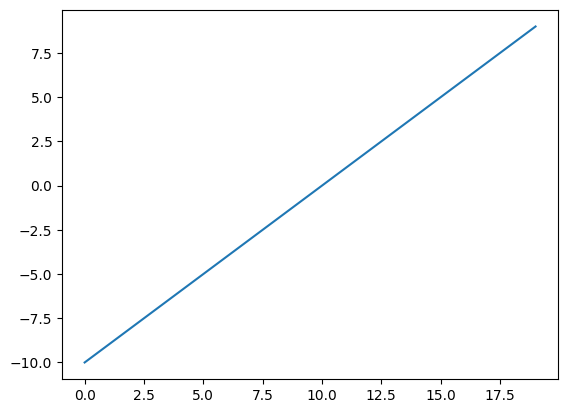

In [59]:
# Visualize the tensor
plt.plot(A)
plt.show()

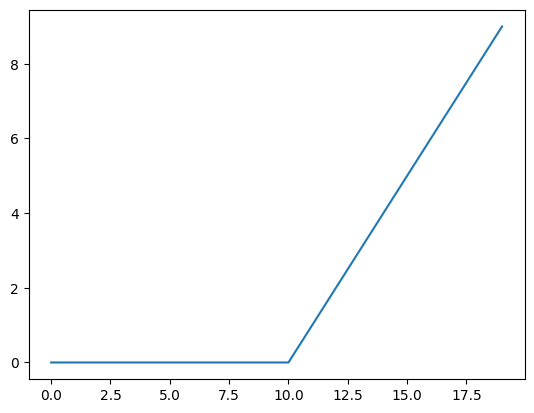

In [60]:
plt.plot(torch.relu(A))
plt.show()

In [62]:
# Custom relu function
def ReLU(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

In [63]:
ReLU(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

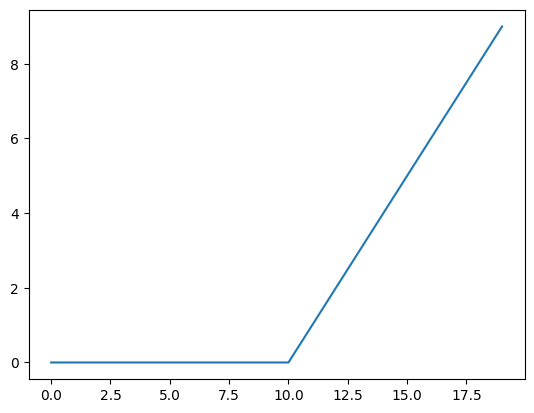

In [66]:
# plotting custom relu
plt.plot(ReLU(A))
plt.show()

In [71]:
# Replicating sigmoid
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

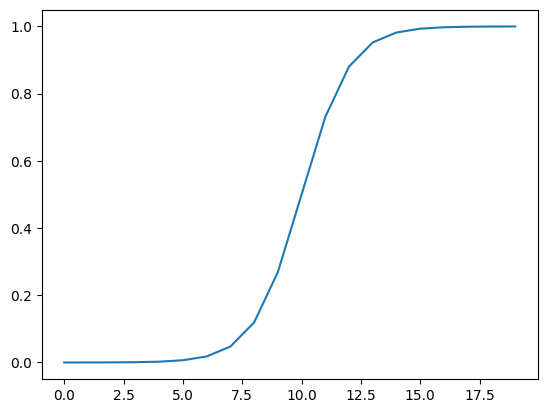

In [72]:
plt.plot(sigmoid(A))
plt.show()

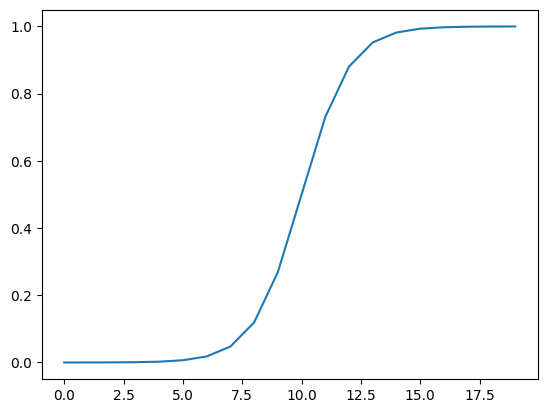

In [70]:
plt.plot(torch.sigmoid(A))
plt.show()